In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



df = pd.read_csv("data/European_Ski_Resorts.csv")
# Copying the original dataset for transformations
ski_resorts_data = df.copy()

# filtering outiers out
ski_resorts_data['SlopeRange'] = ski_resorts_data['HighestPoint'] - ski_resorts_data['LowestPoint']
Q1 = ski_resorts_data['DayPassPriceAdult'].quantile(0.25)
Q3 = ski_resorts_data['DayPassPriceAdult'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ski_resorts_data = ski_resorts_data[(ski_resorts_data['DayPassPriceAdult'] >= lower_bound) & 
                                    (ski_resorts_data['DayPassPriceAdult'] <= upper_bound)]
# One-hot encoding for categorical variables
ski_resorts_data_encoded = pd.get_dummies(ski_resorts_data, columns=['Country', 'Snowparks', 'NightSki'])
ski_resorts_data_encoded.drop(['Resort','Unnamed: 0',],axis=1)
X = ski_resorts_data_encoded.drop(['Resort','Unnamed: 0','DayPassPriceAdult'],axis=1)
y = ski_resorts_data_encoded['DayPassPriceAdult']
feature_names = ski_resorts_data_encoded.drop(['Resort', 'Unnamed: 0'], axis=1).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression MSE: 1.938075262191945e+27


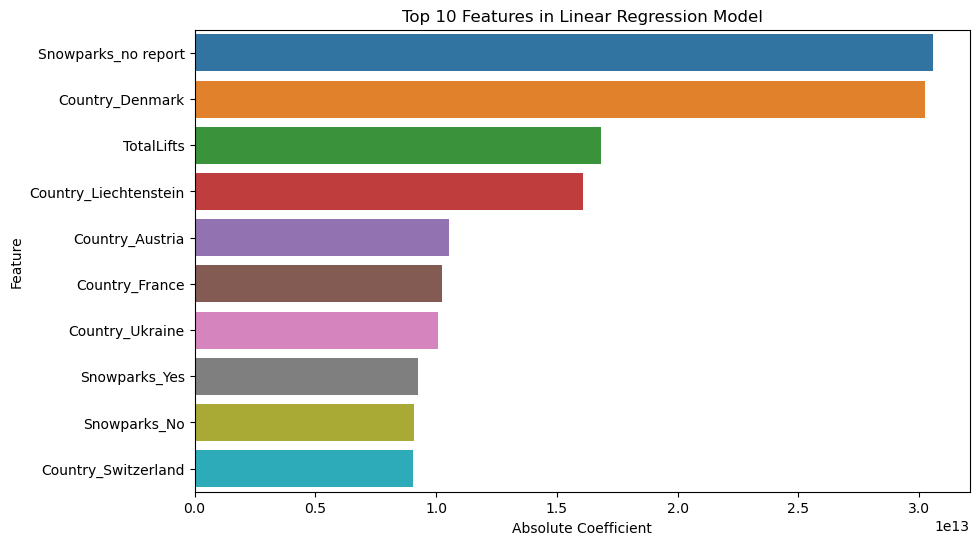

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = linear_reg.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [18]:
coef_df

,Feature,Coefficient,Abs_Coefficient
41,Snowparks_no report,-3.055282e+13,3.055282e+13
18,Country_Denmark,3.022995e+13,3.022995e+13
9,TotalLifts,-1.682672e+13,1.682672e+13
24,Country_Liechtenstein,1.607714e+13,1.607714e+13
14,Country_Austria,-1.054007e+13,1.054007e+13
20,Country_France,-1.024412e+13,1.024412e+13
37,Country_Ukraine,-1.008338e+13,1.008338e+13
40,Snowparks_Yes,9.242689e+12,9.242689e+12
39,Snowparks_No,9.100197e+12,9.100197e+12
36,Country_Switzerland,-9.034491e+12,9.034491e+12


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Splitting Dataset into training and testing sets
#X = ski_resorts_data.drop(['DayPassPriceAdult', 'Resort', 'Unnamed: 0','Country'], axis=1)
#y = ski_resorts_data['DayPassPriceAdult']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_RfR = RandomForestRegressor()
model_RfR.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_RfR.predict(X_test)

# Calculating MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.98337837837838
Mean Squared Error (MSE): 27.893631081081082
Root Mean Squared Error (RMSE): 5.281442140275805


Text(0, 0.5, 'Feature')

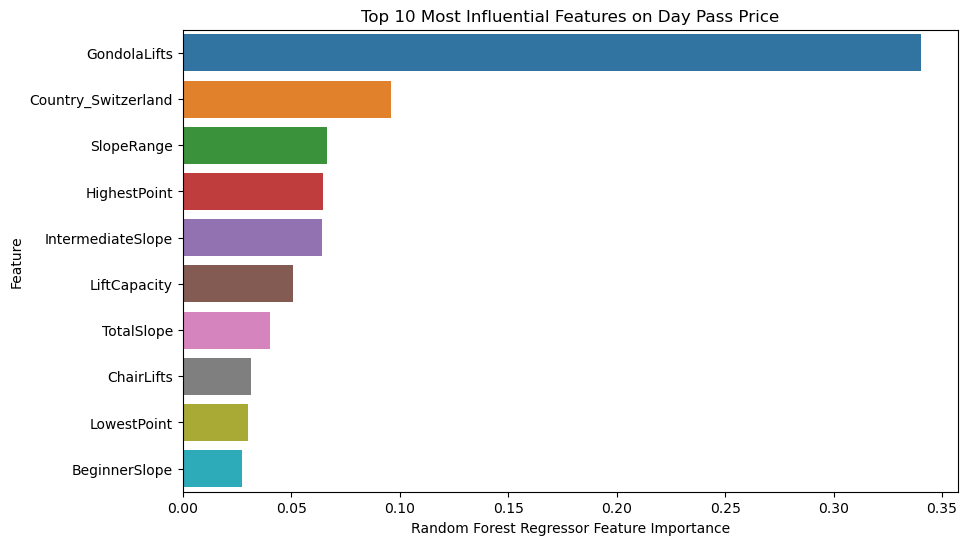

In [20]:
importances = model_RfR.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Influential Features on Day Pass Price')
plt.xlabel('Random Forest Regressor Feature Importance')
plt.ylabel('Feature')

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred))

Decision Tree Regression MSE: 55.945945945945944


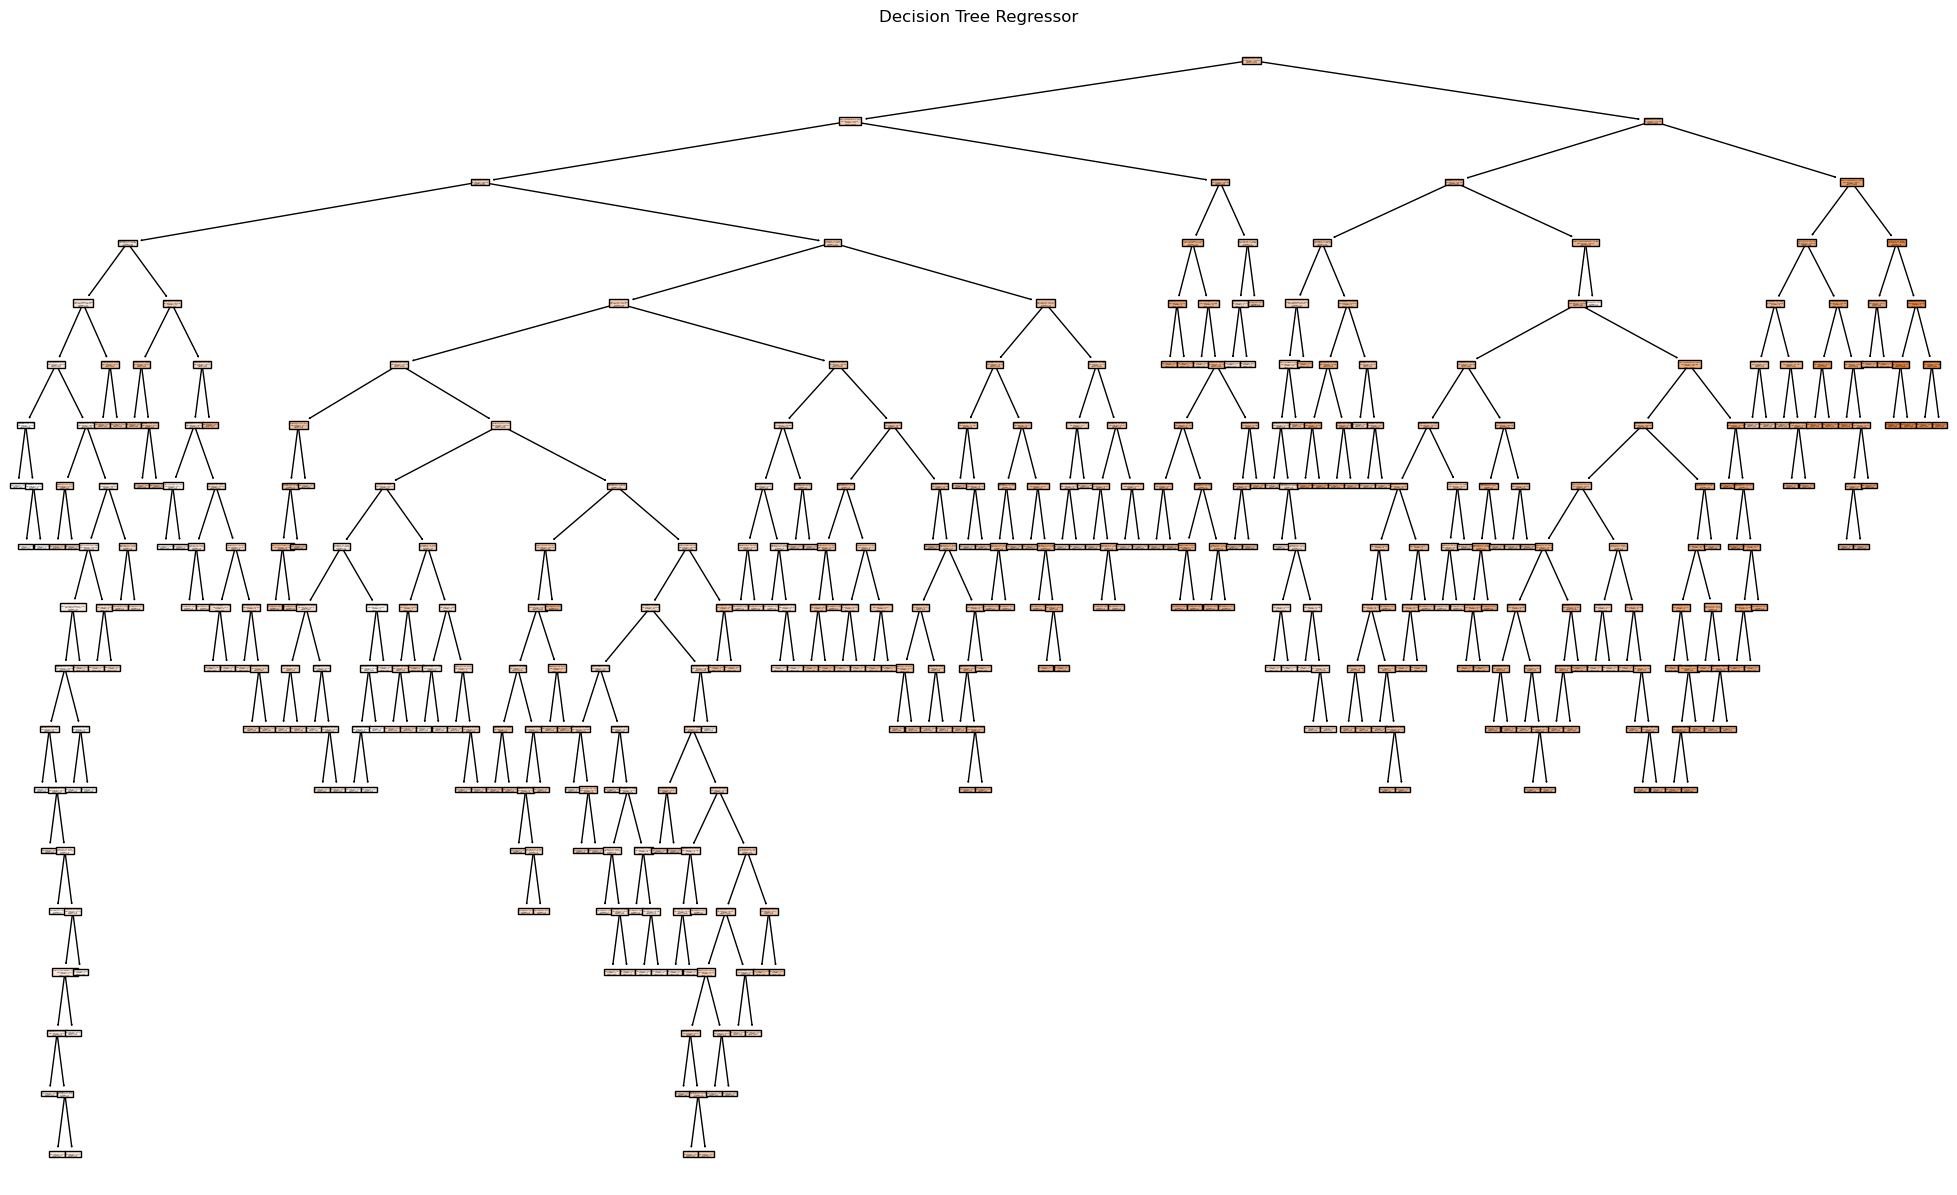

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 15))  # Set the figure size as needed
plot_tree(tree_reg, filled=True, feature_names=list(X.columns))  # 'X_encoded' should be your encoded feature matrix
plt.title("Decision Tree Regressor")
plt.show()

In [23]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)
y_pred = elastic_net_reg.predict(X_test)
print("Elastic Net Regression MSE:", mean_squared_error(y_test, y_pred))

Elastic Net Regression MSE: 30.854962299677354


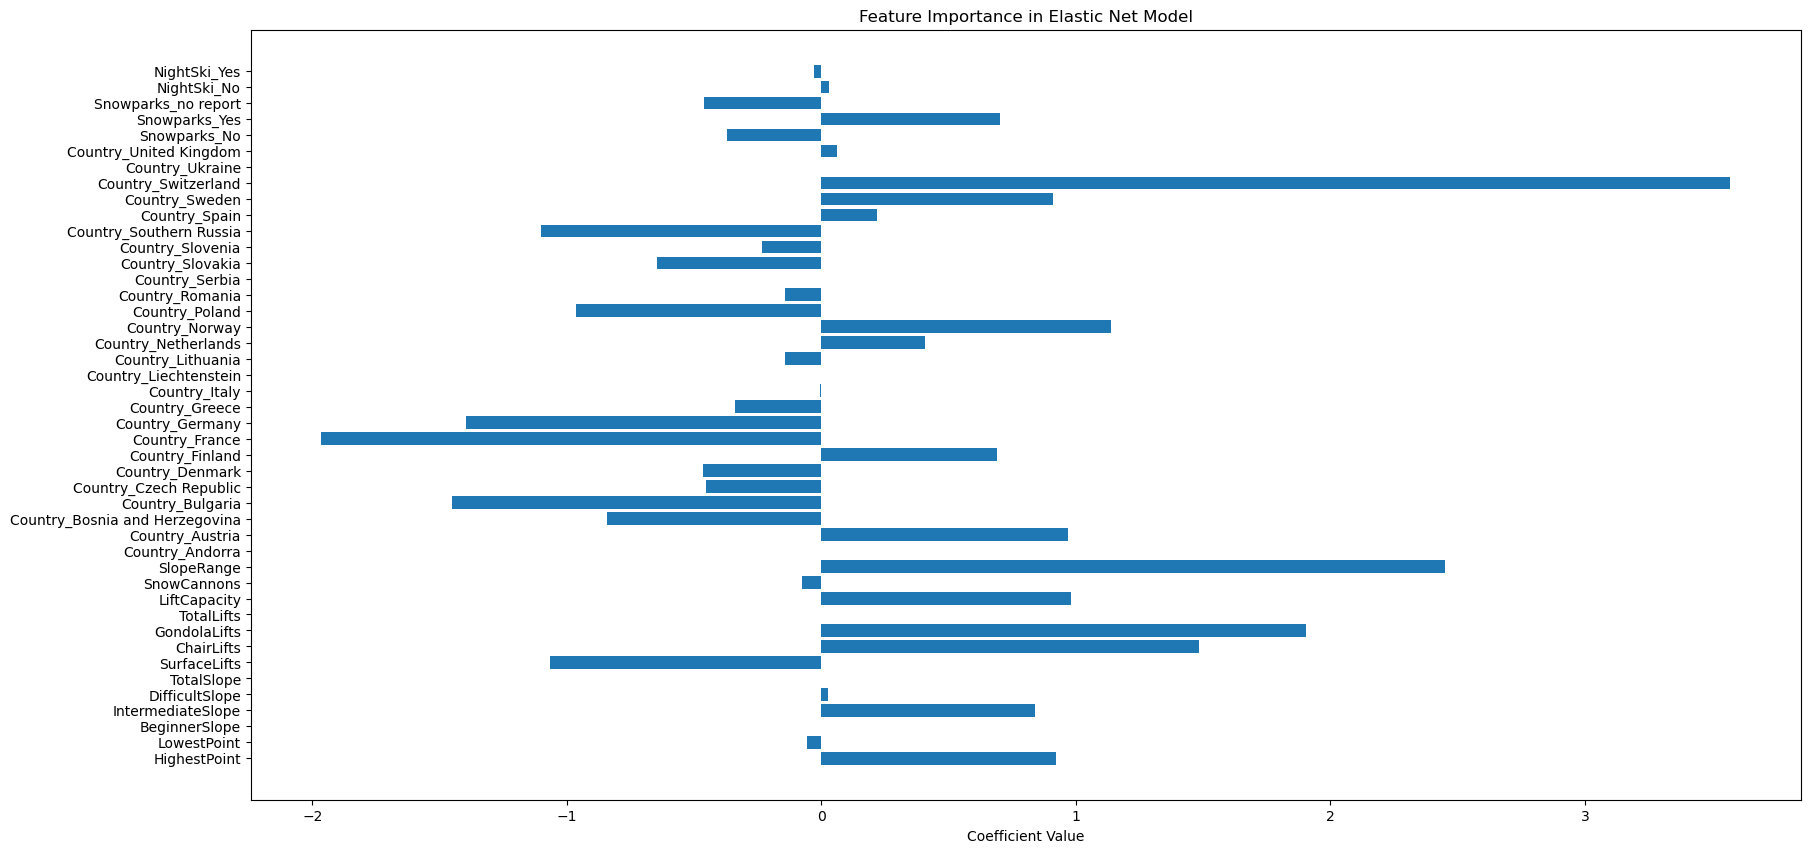

In [24]:
# Extracting coefficients
elastic_net_coef = elastic_net_reg.coef_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(elastic_net_coef)), elastic_net_coef)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Elastic Net Model')
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg.fit(X_train, y_train)
y_pred = gradient_boosting_reg.predict(X_test)
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred))


Gradient Boosting Regression MSE: 30.850107633098922


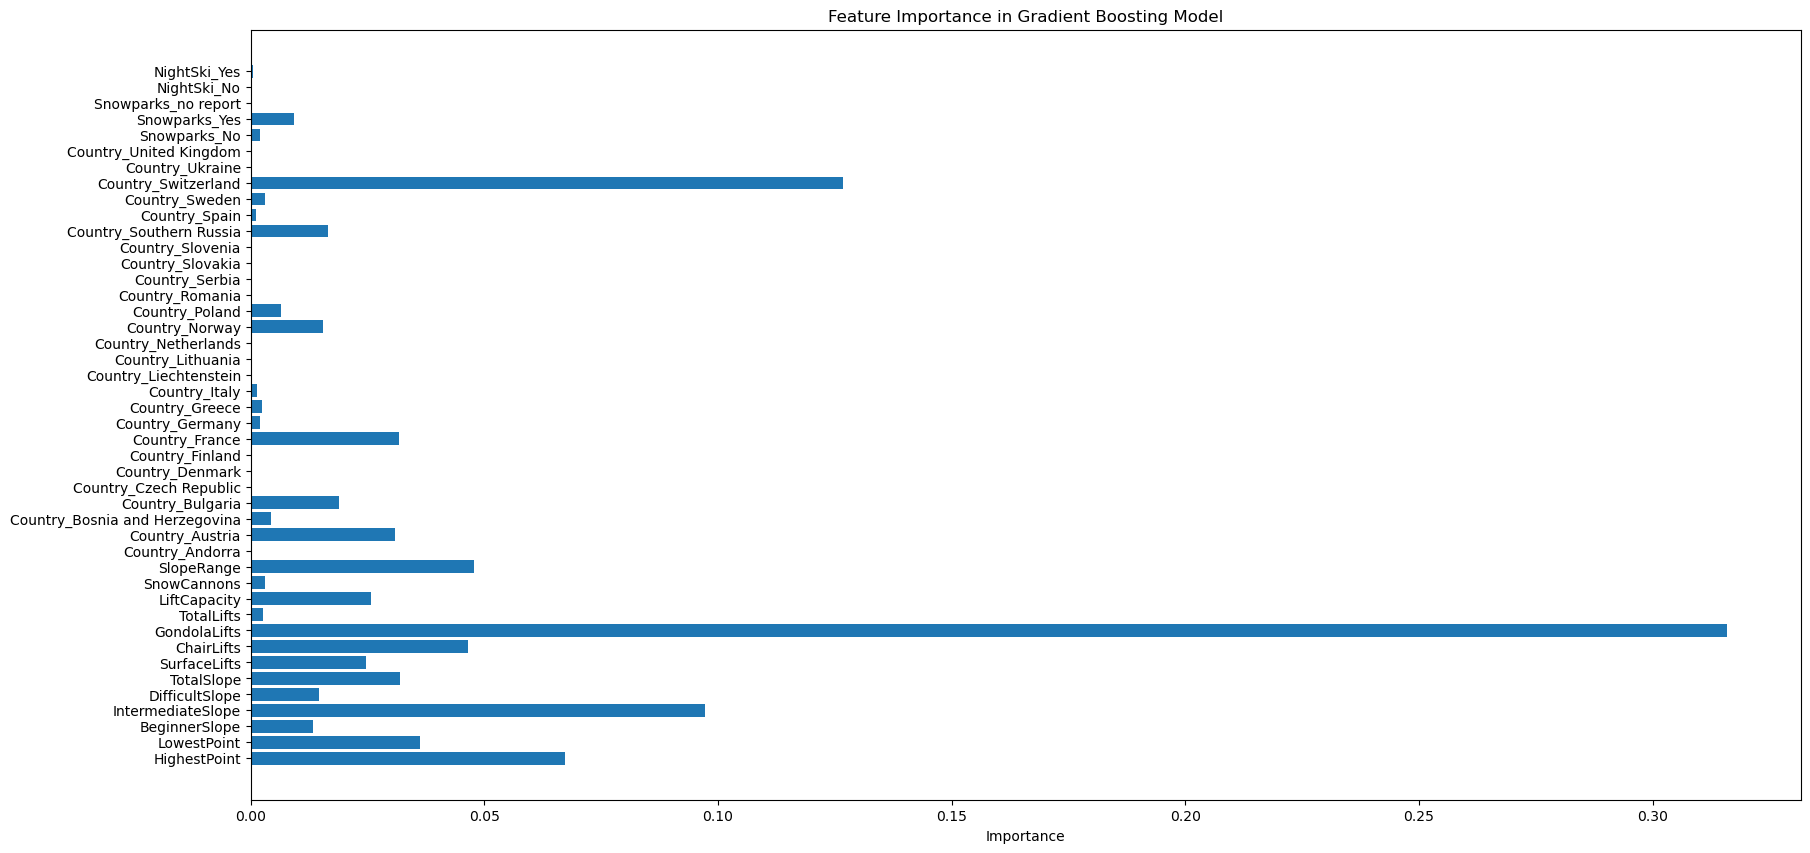

In [26]:
# Extracting feature importance
gbr_feature_importance = gradient_boosting_reg.feature_importances_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(gbr_feature_importance)), gbr_feature_importance)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

In [27]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))


Ridge Regression MSE: 32.54668427200252


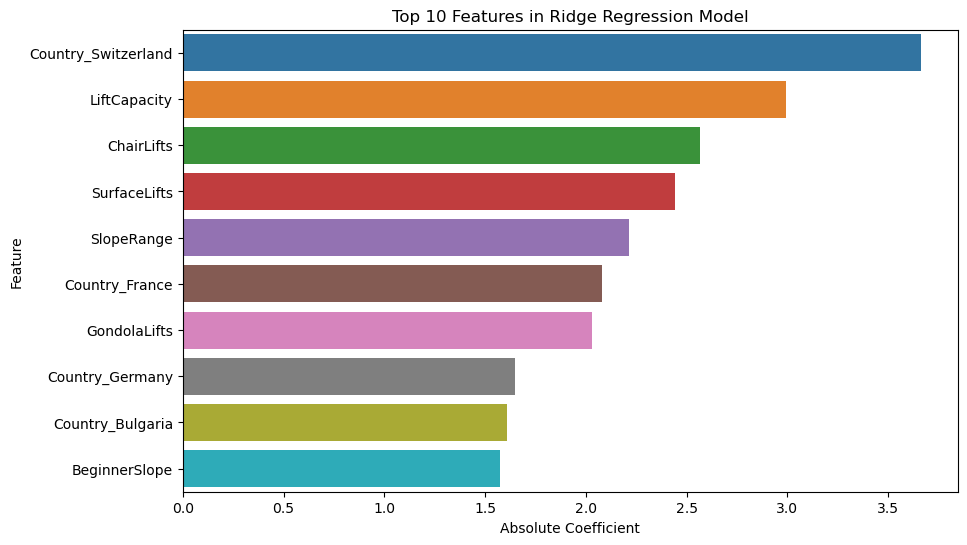

In [28]:
# Extracting coefficients
#feature_names = X.columns
ridge_coef = ridge_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coef})

# Sorting the features by the absolute value of their coefficients
ridge_coef_df['Abs_Coefficient'] = ridge_coef_df['Coefficient'].abs()
ridge_coef_df = ridge_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=ridge_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [29]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred))

Lasso Regression MSE: 31.155981719389988


LowestPoint
BeginnerSlope
DifficultSlope
TotalSlope
TotalLifts
LiftCapacity
SnowCannons
Country_Andorra
Country_Italy
Country_Liechtenstein
Country_Serbia
Country_Ukraine
Snowparks_No
NightSki_No
NightSki_Yes


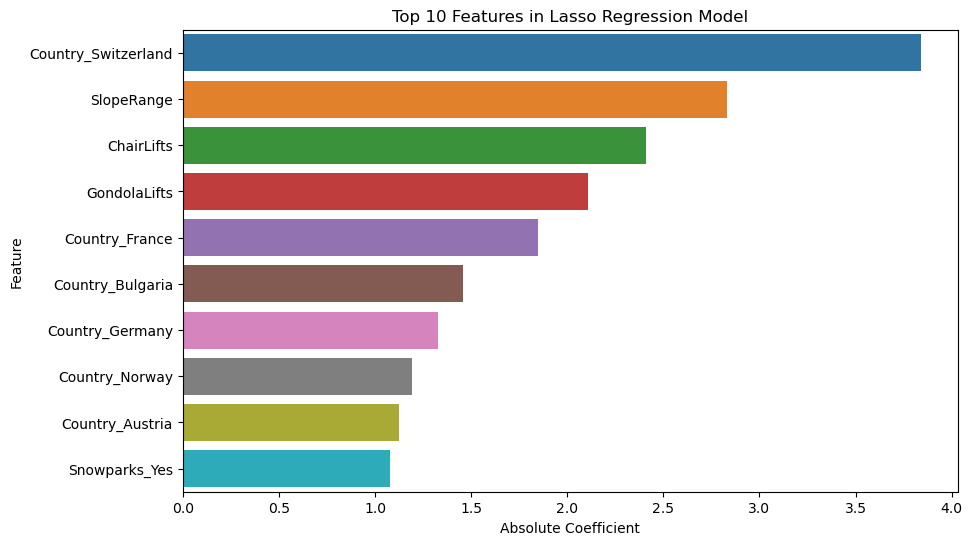

In [30]:
# Extracting coefficients
lasso_coef = lasso_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
# Check which features have a coefficient of zero
for feature, coef in zip(feature_names, lasso_coef):
    if coef == 0:
        print(feature)
    
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})

# Sorting the features by the absolute value of their coefficients
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

### Random Forest Performed Decently but we should explore more with different models and methods.


## Notes:
#### The choice of hyperparameters (like alpha in Ridge/Lasso/ElasticNet, kernel in SVR) can significantly affect the model's performance. Consider using techniques like Grid Search for hyperparameter tuning.
#### Always validate the performance of these models using cross-validation instead of relying on a single test-train split.
#### Mean Squared Error (MSE) is used here as the metric for evaluation, but you might choose other metrics like Mean Absolute Error (MAE) or R² score based on your specific requirements.

## Interpretation of MSE
#### Extremely Low MSE: Generally, a low MSE indicates that the model has made predictions that are very close to the actual values. MSE is a measure of the average squared difference between the predicted and actual values. The closer this value is to zero, the better the model's predictions are considered to be.

#### Possible Overfitting: While a low MSE is usually desirable, a value this close to zero might suggest that the model has overfitted the training data. Overfitting occurs when a model learns the training data too well, including its noise and outliers, making it perform exceptionally on the training data but poorly on unseen or new data.

#### Data Scale and Complexity: The interpretation of MSE also depends on the scale of your target variable and the complexity of the problem. If your target variable has very small values, a low MSE might be expected. However, for more complex or varied data, such a low MSE might be unusual.

#### Numerical Stability or Calculation Errors: Sometimes, extremely small MSE values can result from numerical stability issues in computation or errors in the way MSE is calculated or reported.

## How to Proceed
#### Cross-Validation: Use cross-validation to assess model performance across different subsets of your data to ensure that the model is generalizing well.

#### Check for Overfitting: Evaluate the model on a separate test set to see if the performance is consistent with what you observed during training.

#### Review the Data and Model: Double-check the data preprocessing steps and the model configuration to ensure everything is set up correctly.

#### Consider Model Complexity: If using a complex model, try a simpler model and compare the results. If the simpler model performs similarly, it might be a more appropriate choice due to its lower complexity.

#### Understanding the Context: Always interpret MSE in the context of your specific problem, data scale, and domain.


# Bonus Lets build a pipeline that can train more than one model.... that handles the Pre-Processing of the data.

In [34]:
X.columns

Index(['Country', 'HighestPoint', 'LowestPoint', 'BeginnerSlope',
       'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'Snowparks',
       'NightSki', 'SurfaceLifts', 'ChairLifts', 'GondolaLifts', 'TotalLifts',
       'LiftCapacity', 'SnowCannons'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
file_path = "data/European_Ski_Resorts.csv"
# Reload the dataset
ski_resorts_data = pd.read_csv(file_path)

# Selecting the target variable
target = 'DayPassPriceAdult'

# Separating features and target
X = ski_resorts_data.drop([target, 'Resort', 'Unnamed: 0'], axis=1)  # Dropping non-numeric and identifier columns
y = ski_resorts_data[target]

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline for each regression model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Results dictionary to store evaluation metrics
results = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Create a full pipeline with our preprocessor and the specific model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Storing results
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

results


{'Linear Regression': {'MSE': 3.8847078782634747e+18,
  'RMSE': 1970966229.6101053,
  'R2': -3.578731308111504e+16},
 'Random Forest': {'MSE': 30.83951842105264,
  'RMSE': 5.553333991491296,
  'R2': 0.7158953683028593},
 'Gradient Boosting': {'MSE': 43.01743624463282,
  'RMSE': 6.558767890742347,
  'R2': 0.6037080503665178}}